In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
conn = pyodbc.connect(r"driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;")
conx_string = "driver={SQL SERVER};server=LAPTOP-V88UBQAA\SQLSERVERVINCENT;database=AdventureWorks2016;trusted_connection=YES;"
query2 = "SELECT TOP (1000) [PRS_START_TIME],[PRS_END_TIME],[PRS_STATE],[PRS_BUSINESS_KEY],try_convert(float, RIGHT(PRS_Business_key, len(PRS_BUSINESS_KEY) - charindex(':', prs_business_key))) as Business_Key, try_convert(float, DATEDIFF(MILLISECOND, PRS_START_TIME,PRS_END_TIME)) as Process_Time FROM [ORCHESTRA].[dbo].[ORC_PROCESS_STATE];"
SQLquery = pd.read_sql_query(query2, conn)
conx = pyodbc.connect(conx_string);
cursor = conx.cursor();
cursor.execute(query2);
data = cursor.fetchall()

In [3]:
df = pd.DataFrame(SQLquery, columns=['PRS_STATE','Business_Key', 'Process_Time'])
df = df.drop(31, axis=0)

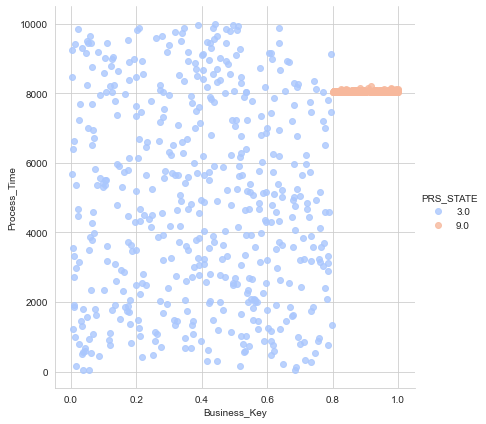

In [4]:
sns.set_style('whitegrid')
sns.lmplot('Business_Key','Process_Time',data=df, hue='PRS_STATE',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

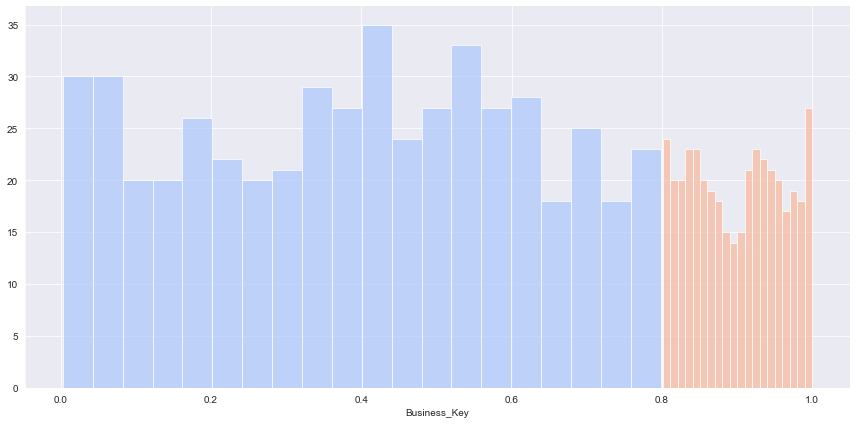

In [5]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="PRS_STATE",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Business_Key',bins=20,alpha=0.7)

In [6]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=8)

In [25]:
df2 = df.drop('PRS_STATE',axis=1)

In [26]:
df3 = df2

scaler = MinMaxScaler()

scaler.fit(df3[['Process_Time']])
df3['Process_Time'] = scaler.transform(df3[['Process_Time']])

#scaler.fit(df3[['Process_Time']])
#df3['Process_Time'] = scaler.transform(df3[['Process_Time']])
df3

,Business_Key,Process_Time
0,0.918076,0.820287
1,0.973258,0.803448
2,0.907102,0.804851
3,0.915213,0.802546
4,0.816468,0.807156
...,...,...
898,0.584991,0.600080
899,0.926771,0.810163
900,0.844300,0.804450
901,0.554691,0.778491


In [27]:
kmeans.fit(df3)

KMeans()

In [28]:
kmeans.cluster_centers_

array([[0.89481246, 0.80427938],
       [0.11515649, 0.17340181],
       [0.13968973, 0.83952928],
       [0.64360426, 0.16661321],
       [0.61928904, 0.50513142],
       [0.4749438 , 0.86100182],
       [0.23757235, 0.52593533],
       [0.3988798 , 0.23569464]])

In [29]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 7, 4, 4, 0, 7, 2, 7,
       1, 4, 1, 0, 5, 1, 3, 7, 1, 0, 4, 5, 0, 4, 0,

In [30]:
df3['Labels'] = kmeans.labels_.tolist()

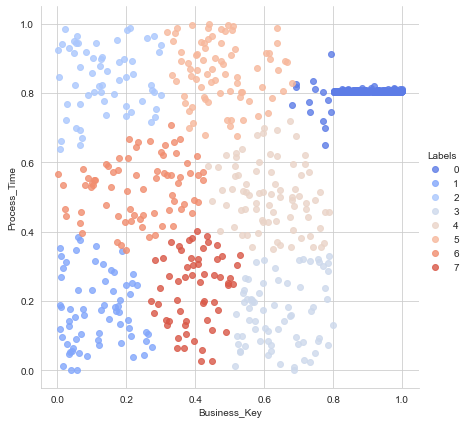

In [31]:
sns.set_style('whitegrid')
sns.lmplot('Business_Key','Process_Time',data=df3, hue='Labels',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [32]:
#So called "Elbow Method", where the number of clusters K is evaluated by interpreting the results of different
#Cluster counts visually, by looking for the "Elbow", the sharp bend that looks like an elbow
import sklearn.cluster as cluster

In [33]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [34]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,6.374419e+09
1,2,1.072616e+09
2,3,4.375146e+08
3,4,2.711737e+08
4,5,1.702376e+08
5,6,1.177926e+08
6,7,8.180372e+07
7,8,6.205184e+07
8,9,4.882652e+07
9,10,4.034354e+07


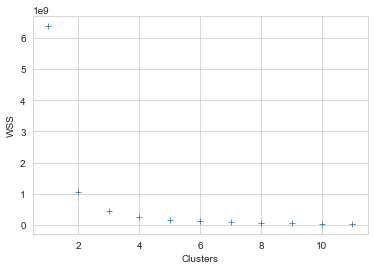

In [35]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 5 Clusters

Based on the plot, the "Ellbow" is located somewhere between 3 and 5 Clusters

In [36]:
#So called "Silhoutte Method", where the number of clusters K is determined, by outlining the results of different number
#of Clusters mathematically
import sklearn.metrics as metrics

In [37]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.754238494017614
Silhouette score for k(clusters) = 4 is 0.7416484496928889
Silhouette score for k(clusters) = 5 is 0.7337327672529119
Silhouette score for k(clusters) = 6 is 0.7348019421007165
Silhouette score for k(clusters) = 7 is 0.7313825611611916
Silhouette score for k(clusters) = 8 is 0.7384933667938606
Silhouette score for k(clusters) = 9 is 0.7355679271397129
Silhouette score for k(clusters) = 10 is 0.731368999731038
Silhouette score for k(clusters) = 11 is 0.727231138521162
Silhouette score for k(clusters) = 12 is 0.7232659794341737


The evaluation score is the highest for K = 3 Clusters, matching the metric from the elbow method